In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Setup")

Setup


In [2]:
data10 = pd.read_csv("../data/hist.csv").values
data10

array([[4.000e+00, 2.000e+00, 5.000e-03],
       [5.000e+00, 1.000e+00, 2.500e-03],
       [6.000e+00, 1.300e+01, 3.250e-02],
       [7.000e+00, 1.400e+01, 3.500e-02],
       [8.000e+00, 2.600e+01, 6.500e-02],
       [9.000e+00, 3.100e+01, 7.750e-02],
       [1.000e+01, 4.300e+01, 1.075e-01],
       [1.100e+01, 4.600e+01, 1.150e-01],
       [1.200e+01, 4.000e+01, 1.000e-01],
       [1.300e+01, 4.600e+01, 1.150e-01],
       [1.400e+01, 3.000e+01, 7.500e-02],
       [1.500e+01, 2.600e+01, 6.500e-02],
       [1.600e+01, 2.300e+01, 5.750e-02],
       [1.700e+01, 2.600e+01, 6.500e-02],
       [1.800e+01, 1.100e+01, 2.750e-02],
       [1.900e+01, 6.000e+00, 1.500e-02],
       [2.000e+01, 6.000e+00, 1.500e-02],
       [2.100e+01, 3.000e+00, 7.500e-03],
       [2.200e+01, 3.000e+00, 7.500e-03],
       [2.300e+01, 2.000e+00, 5.000e-03],
       [2.400e+01, 1.000e+00, 2.500e-03],
       [2.500e+01, 1.000e+00, 2.500e-03]])

In [3]:
data40 = pd.read_csv("../data/data.csv").values.T[0]
data40 = data40[::2]+data40[1::2]
np.savetxt("data40.csv", data40.astype(int).T, delimiter=",", fmt='%d')
print(set(data40))

{33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 69}


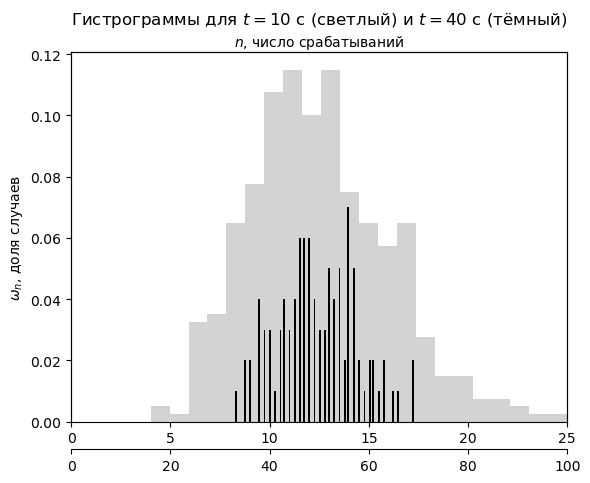

In [4]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("$\omega_n$, доля случаев")
ax1.set_title("Гистрограммы для $t=10$ с (светлый) и $t=40$ с (тёмный)")
ax1.hist(data10[:,0], len(data10), weights=data10[:,1]/sum(data10[:,1]), color="lightgrey")
ax1.set_xlim(0,25)
ax2=ax1.twiny()
ax2.set_xlabel("$n$, число срабатываний")
ax2.get_xaxis().set_ticks_position("bottom")
ax2.spines['bottom'].set_position(('outward', 20))
ax2.hist(data40, len(data40), weights=np.ones(len(data40))/len(data40), color="black")
ax2.set_xlim(0,100)
plt.savefig("lol.png", dpi=400)

In [5]:
temp = data10
data10 = []
for row in temp:
    for i in range(int(row[1])):
        data10.append(row[0])
data10 = np.array(data10)
del temp

In [6]:
from math import sqrt

print("Mean.\n  40: {}\n  10: {}\n".format(data40.mean(), data10.mean()))
print("Std.\n  40: {},\n  10: {}\n".format(np.std(data40), np.std(data10)))
print("Sqrt.\n  40: {}\n  10: {}\n".format(sqrt(data40.mean()), sqrt(data10.mean())))

Mean.
  40: 49.63
  10: 12.415

Std.
  40: 7.8951314111925965,
  10: 3.6841247264445323

Sqrt.
  40: 7.044856279584418
  10: 3.5234925854895733



In [7]:
sigma10 = np.std(data10)
sigma40 = np.std(data40)
mean10 = data10.mean()
mean40 = data40.mean()

n1_10 = len(list(filter(lambda x: abs(x - mean10) <= sigma10, data10)))/len(data10)
n2_10 = len(list(filter(lambda x: abs(x - mean10) <= 2*sigma10, data10)))/len(data10)
n1_40 = len(list(filter(lambda x: abs(x - mean40) <= sigma40, data40)))/len(data40)
n2_40 = len(list(filter(lambda x: abs(x - mean40) <= 2*sigma40, data40)))/len(data40)
print("t=10:\n  sigma:  {}\n  2sigma: {}\n\nt=40:\n  sigma:  {}\n  2sigma: {}".format(n1_10, n2_10, n1_40, n2_40))

t=10:
  sigma:  0.7125
  2sigma: 0.9525

t=40:
  sigma:  0.7
  2sigma: 0.96


(array([ 5., 19., 23., 21., 14., 12.,  3.,  2.,  1.,  0.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

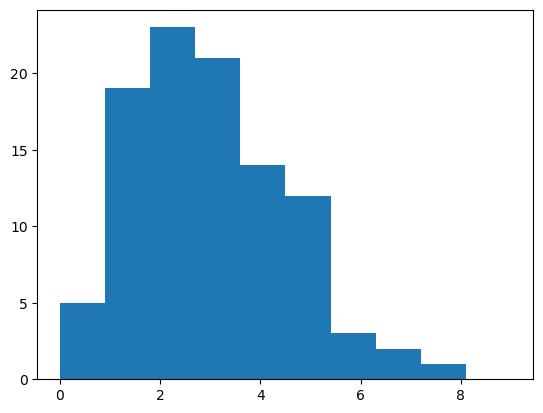

In [24]:
data = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [5, 19, 23, 21, 14, 12, 3, 2, 1, 0]])
plt.hist(data[0], weights=data[1])

In [25]:
temp = data.T
data = []
for row in temp:
    for i in range(int(row[1])):
        data.append(row[0])
data = np.array(data)
del temp
data

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8])

In [26]:
print(data.mean())
print(np.std(data))

2.84
1.6954055562018195


In [27]:
sigma = np.std(data)
mean = data.mean()
n1 = len(list(filter(lambda x: abs(x - mean) <= sigma, data)))/len(data)
n2 = len(list(filter(lambda x: abs(x - mean) <= 2*sigma, data)))/len(data)
n3 = len(list(filter(lambda x: abs(x - mean) <= 3*sigma, data)))/len(data)
print(n1, n2, n3, sep='\n')

0.58
0.97
0.99
